Run msed like in the experiment.
Change the query number in second block to get a differnt query.

index	query	cat	cat string	
0	130995	124	9	ostrich
1	682918	143	12	house finch	
2	770223	110	15	robin
3	903223	106	31	tree frog	
4	642214	109	131	little blue heron
5	984174	125	145	king penguin
6	336954	147	146	albatross	
7	681592	121	148	killer whale
8	191942	122	150	sea lion	
9	638298	134	151	Chihuahua	
10	290711	124	207	golden retriever
11	173244	144	292	tiger	
12	721311	132	310	ant
13	451934	142	315	mantis	
14	558566	120	320	damselfly
15	340892	144	324	cabbage butterfly
16	162775	102	327	starfish
17	28930	133	348	ram	
18	473871	136	354	Arabian camel
19	405776	136	366	gorilla
20	755674	137	401	accordion
21	847928	154	402	acoustic guitar
22	850602	122	406	altar
23	754353	135	424	barbershop	
24	371694	101	433	bathing cap	
25	614567	157	441	beer glass	
26	441896	111	442	bell cote	
27	691776	105	447	binoculars	
28	698514	109	448	birdhouse	
29	241503	165	452	bonnet	30	
30	812009	165	455	bottlecap	
31	309754	120	457	bow tie	50	
32	214265	132	460	breakwater	
33	297463	114	466	bullet train
34	618345	174	475	car mirror
35	772703	159	476	carousel  
36	74716	119	488	chain
37	400612	103	510	container ship
38	599738	113	515	cowboy hat
39	276246	183	536	dock
40	839008	138	546	electric guitar
41	872746	150	555	fire engine	
42	912534	159	568	fur coat	
43	870028	162	603	horse cart	
44	948247	172	605	iPod	
45	900829	160	608	jean	
46	168689	102	615	knee pad	
47	778937	134	616	knot
48	845080	119	629	lipstick	
49	731243	110	637	mailbox
50	121178	118	640	manhole cover
51	231448	121	644	matchstick
52	686037	126	655	miniskirt 
53	707906	118	661	Model T	
54	742723	145	671	mountain bike
55	427705	157	679	necklace	
56	791384	114	687	organ		
57	87287	169	695	padlock		
58	865937	154	701	parachute	
59	229715	130	705	passenger car
60	440180	175	708	pedestal	
61	112923	120	715	pickelhaube	
62	194559	155	716	picket fence
63	490397	104	724	pirate	
64	797010	117	733	pole	
65	806501	111	734	police van
66	349561	147	736	pool table
67	66031	129	738	pot	
68	796096	101	746	puck
69	192367	148	770	running shoe
70	731454	119	781	scoreboard	
71	617078	125	791	shopping cart
72	258942	102	795	ski	
73	419779	152	806	sock
74	469493	105	807	solar dish
75	820031	132	817	sports car
76	340797	123	842	swimming trunks
77	26408	173	843	swing		
78	539669	102	847	tank		
79	800151	182	853	thatch		
80	30033	122	865	toyshop		
81	407322	108	872	tripod		
82	606369	132	890	volleyball	
83	794853	124	900	water tower	
84	146049	106	904	window screen
85	552379	169	912	worm fence	
86	77160	157	918	crossword puzzle
87	378285	110	937	broccoli	
88	328403	137	945	bell pepper	
89	900928	143	950	orange	
90	970259	138	957	pomegranate	
91	306055	113	960	chocolate sauce	
92	991262	167	963	pizza	
93	17069	160	967	espresso
94	274408	120	972	cliff	
95	577276	131	974	geyser	
96	40735	180	975	lakeside	
97	390037	129	976	promontory	
98	27786	153	981	ballplayer	
99	905006	162	982	groom	

In [31]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.msedOO import l1_norm

allData = l1_norm(allData)


In [32]:
from simcoder.similarity import getDists
from simcoder.count_cats import *
from simcoder.msedOO import msed
import numpy as np

with open( "../selected_queries.txt","r" ) as f:
    queries = [int(line.strip()) for line in f ]

query = queries[5]

dists = getDists(query, allData)
closest_indices = np.argsort(dists)  # the closest images to the query
    
best_k_for_one_query = closest_indices[0:100]  # the k closest indices in data to the query
category = get_topcat(query, smData)
best_k_categorical = getBestCatsInSubset(category, best_k_for_one_query, smData)  # the closest indices in category order - most peacocky peacocks etc.
poly_query_indexes = best_k_categorical[0:6]  # These are the indices that might be chosen by a human
poly_query_data = allData[poly_query_indexes]  # the actual datapoints for the queries

base = msed(np.array(poly_query_data))
complexities = base.msed(allData)



In [33]:

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


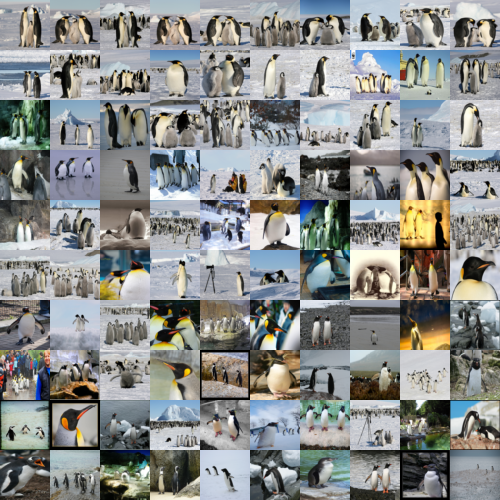

In [34]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)